In [5]:
import numpy as np
from matplotlib import pyplot as plt
from ad_afqmc.lno_ccsd import lno_ccsd


In [ ]:
# H20 a=d=1.831
# converged SCF energy = -10.5090856285428
# E(RCCSD) = -10.81770019601613  E_corr = -0.3086145674733174
# RCCSD(T) correction = -0.00677852255576606
# ccsd(t) energy: -10.824478718571896
# AFQMC energy: -10.8236 +/- 0.0002
# DMRG energy (extrapolated) =  -10.825767390885549
e_mf = -10.5090856285428
ccsd_corr = -0.3086145674733174
ccsd_t_corr = -10.824478718571896 - e_mf
dmrg_corr = -10.825767390885549 - e_mf
afqmc_corr = -10.8236 - e_mf
afqmc_err = 0.0002
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.419894       0.000054        -0.449926       -0.419445       -0.391397       0.000566        -0.028495       0.000546        7.07    8       4.93    6       920.84
 (3.00e-04,3.00e-05)     -0.450317       0.000058        -0.464229       -0.449508       -0.410198       0.000557        -0.040117       0.000562        8.93    10      5.73    6       994.08
 (1.00e-04,1.00e-05)     -0.464367       0.000069        -0.468504       -0.462183       -0.403669       0.000683        -0.060698       0.000618        12.00   14      8.93    10      1159.15
 (1.00e-05,1.00e-06)     -0.471842       0.000129        -0.472497       -0.466976       -0.374787       0.000583        -0.097055       0.000532        18.67   24      14.53   18      1503.28
 (1.00e-06,1.00e-07)     -0.474013       0.000207        -0.474066       -0.466843       -0.342254       0.000501        -0.131759       0.000392        24.80   28      21.73   26      2032.95
 (1.00e-07,1.00e-08)     -0.476777       0.000310        -0.476777       -0.466466       -0.321015       0.000451        -0.155761       0.000284        28.67   30      27.33   30      2514.62
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

In [ ]:
# H20 a=d=2 bohr sto6g
# converged SCF energy = -10.4058146141987
# E(RCCSD) = -10.76994157048069  E_corr = -0.3641269562820326
# RCCSD(T) correction = -0.00807772361929805
# ccsd(t) energy: -10.778019294099984
# AFQMC energy: -10.7756 +/- 0.0002
# DMRG energy (extrapolated) =  -10.779693626674682 +/-    0.0000000000
e_mf = -10.4058146141987
ccsd_corr = -0.3641269562820326
ccsd_t_corr = -10.778019294099984 - e_mf
dmrg_corr = -10.779693626674682 - e_mf
afqmc_corr = -10.7756 - e_mf
afqmc_err = 0.0002
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.342523       0.000048        -0.354596       -0.343134       -0.307344       0.000624        -0.035179       0.000613        7.00    8       5.20    6       680.13
 (3.00e-04,3.00e-05)     -0.353770       0.000056        -0.360837       -0.354057       -0.313428       0.000709        -0.040342       0.000709        8.40    10      5.60    6       708.35
 (1.00e-04,1.00e-05)     -0.362234       0.000084        -0.364241       -0.361483       -0.303398       0.000615        -0.058835       0.000627        11.20           14      8.40    10      804.40
 (1.00e-05,1.00e-06)     -0.367925       0.000144        -0.368202       -0.364379       -0.283079       0.000573        -0.084848       0.000477        15.40           18      12.80   16      930.42
 (1.00e-06,1.00e-07)     -0.369327       0.000271        -0.369340       -0.364271       -0.259677       0.000520        -0.109649       0.000386        18.80           20      17.60   20      1129.42
 (1.00e-07,1.00e-08)     -0.370042       0.000290        -0.370042       -0.364145       -0.252020       0.000580        -0.118022       0.000400        19.80           20      19.60   20      1203.97
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

In [7]:
print(dmrg_corr)
print(ccsd_t_corr)
print(afqmc_corr)

-0.37387901247598165
-0.3722046799012837
-0.3697853858013005


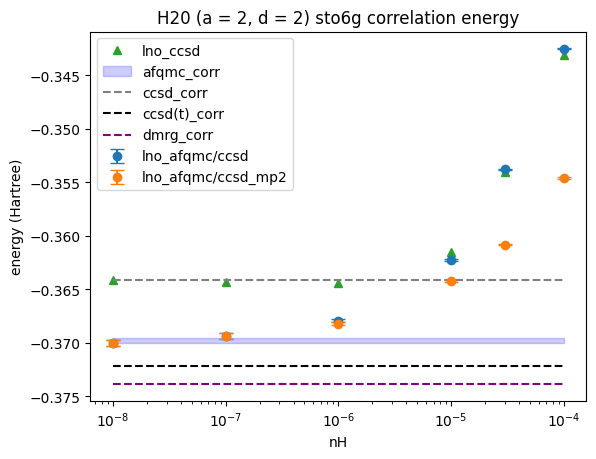

In [10]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 2, d = 2) sto6g correlation energy')
plt.legend()
plt.show()

In [2]:
# H20 a=d=2 bohr ccpvdz
# converged SCF energy = -10.6973805689852
# E(RCCSD) = -11.16927530326717  E_corr = -0.4718947342819635
# RCCSD(T) correction = -0.00807772361929805
# ccsd(t) energy: 
# AFQMC energy: -11.1871 +/- 0.0002
# DMRG energy (extrapolated) =  
e_mf = -10.6973805689852
ccsd_corr = -0.4718947342819635
# ccsd_t_corr = -10.778019294099984 - e_mf
# dmrg_corr = -10.779693626674682 - e_mf
afqmc_corr = -11.1871 - e_mf
afqmc_err = 0.0002
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.439980       0.000052        -0.475082       -0.441736       -0.401213       0.000465        -0.038767       0.000448        14.40           15      5.60    6       1112.66
 (3.00e-04,3.00e-05)     -0.455870       0.000065        -0.476756       -0.455361       -0.407684       0.000554        -0.048187       0.000472        20.80           23      6.80    8       1490.25
 (1.00e-04,1.00e-05)     -0.472493       0.000123        -0.478647       -0.468121       -0.405580       0.000552        -0.066913       0.000463        33.00           37      8.80    10      2290.96
 (1.00e-05,1.00e-06)     -0.477755       0.000241        -0.478548       -0.471705       -0.373416       0.000502        -0.104339       0.000393        56.40           68      14.40   18      5547.56
 (1.00e-06,1.00e-07)     -0.482889       0.000271        -0.482941       -0.471893       -0.348705       0.000437        -0.134182       0.000237        81.40           94      18.80   20      11675.55
 (1.00e-07,1.00e-08)     -0.488165       0.000236        -0.488169       -0.471896       -0.342617       0.000422        -0.145547       0.000258        96.00           100     20.00   20      15690.75
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

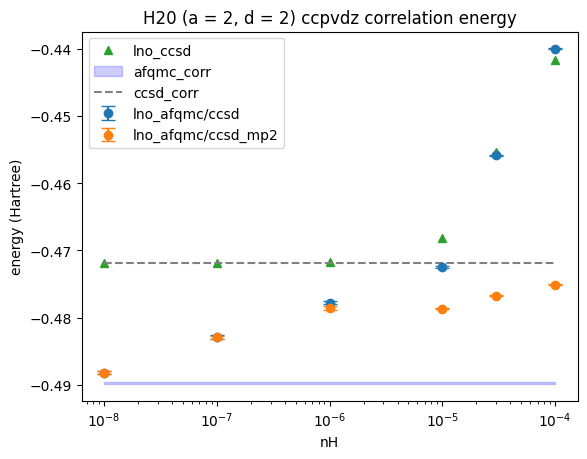

In [5]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
# plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 2, d = 2) ccpvdz correlation energy')
plt.legend()
plt.show()

In [2]:
def lno_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      mp2_corr = lno_data[:,0]
      ccsd_corr = lno_data[:,1]
      afqmc_hf_corr = lno_data[:,2]
      afqmc_hf_err = lno_data[:,3]
      afqmc_cc_corr = lno_data[:,4]
      afqmc_cc_err = lno_data[:,5]
      mp2_cr = lno_data[:,6]

      return lno_thresh,mp2_corr,ccsd_corr,afqmc_hf_corr,afqmc_hf_err,afqmc_cc_corr,afqmc_cc_err,mp2_cr

In [3]:
data = '''
# thresh(occ,vir)         mp2_corr       ccsd_corr      afqmc/hf_corr      err       afqmc/ccsd_corr        err           nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.195684       -0.278930       -0.296843       0.009933        -0.278947       0.000050        -0.01884435  4.80       6       6.80    8       357.61
 (1.00e-04,1.00e-05)     -0.212182       -0.306100       -0.356103       0.017907        -0.306694       0.000080        -0.00234632  8.40       10      11.20           14      623.63
 (1.00e-05,1.00e-06)     -0.214180       -0.308972       -0.348559       0.014711        -0.311309       0.000132        -0.00034834  12.80      16      15.80           18      1098.77
 (1.00e-06,1.00e-07)     -0.214510       -0.308834       -0.347321       0.031031        -0.313152       0.000197        -0.00001834  17.60      20      18.80           20      1649.39
'''

In [4]:
lno_thresh,mp2_corr,ccsd_corr,afqmc_hf_corr,afqmc_hf_err,afqmc_cc_corr,afqmc_cc_err,mp2_cr=lno_data(data)

In [9]:
# afqmc energy: -10.822890 +/- 0.000270
afqmc_e = -10.822890
afqmc_err = 0.000270
e_mf = -10.50909636
print(afqmc_e+10.50909636)

-0.3137936400000001


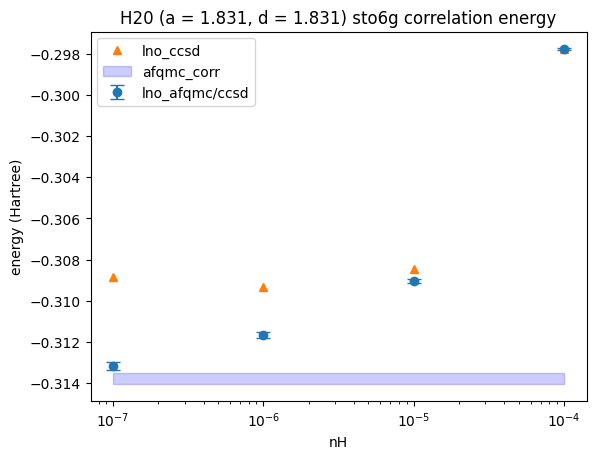

In [12]:
# plt.errorbar(
#     lno_thresh,afqmc_hf_corr,yerr=afqmc_hf_err,fmt='o',capsize=5,label='lno_afqmc/hf')
plt.errorbar(
    lno_thresh,afqmc_cc_corr+mp2_cr,yerr=afqmc_cc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.plot(
    lno_thresh,ccsd_corr+mp2_cr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
# plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) sto6g correlation energy')
plt.legend()
plt.show()